In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as exp

In [ ]:
df = pd.read_csv('ipl.csv')

In [ ]:
df

,Season,Name,Nationality,Type,Team,Price
0,2023,Ajinkya Rahane,Indian,Batter,Chennai Super Kings,"50,00,000"
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,"1,00,00,000"
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,"60,00,000"
...,...,...,...,...,...,...
279,2022,Fazalhaq Farooqi,Overseas,Bowler,Sunrisers Hyderabad,"50,00,000"
280,2022,Sean Abbott,Overseas,Bowler,Sunrisers Hyderabad,"2,40,00,000"
281,2022,R Samarth,Indian,Batsman,Sunrisers Hyderabad,"20,00,000"
282,2022,Shashank Singh,Indian,All-Rounder,Sunrisers Hyderabad,"20,00,000"


In [ ]:
df.isnull().sum()

Season         0
Name           0
Nationality    0
Type           0
Team           0
Price          0
dtype: int64

In [ ]:
df.shape

(284, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       284 non-null    int64 
 1   Name         284 non-null    object
 2   Nationality  284 non-null    object
 3   Type         284 non-null    object
 4   Team         284 non-null    object
 5   Price        284 non-null    object
dtypes: int64(1), object(5)
memory usage: 13.4+ KB


In [ ]:
df['Price'] = df['Price'].astype(str)

In [ ]:
df

,Season,Name,Nationality,Type,Team,Price
0,2023,Ajinkya Rahane,Indian,Batter,Chennai Super Kings,"50,00,000"
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,"1,00,00,000"
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,"60,00,000"
...,...,...,...,...,...,...
279,2022,Fazalhaq Farooqi,Overseas,Bowler,Sunrisers Hyderabad,"50,00,000"
280,2022,Sean Abbott,Overseas,Bowler,Sunrisers Hyderabad,"2,40,00,000"
281,2022,R Samarth,Indian,Batsman,Sunrisers Hyderabad,"20,00,000"
282,2022,Shashank Singh,Indian,All-Rounder,Sunrisers Hyderabad,"20,00,000"


In [ ]:
df['Price'] = df['Price'].str.translate({ord(','): None})

In [ ]:
df.head()

,Season,Name,Nationality,Type,Team,Price
0,2023,Ajinkya Rahane,Indian,Batter,Chennai Super Kings,5000000
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,2000000
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,10000000
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,2000000
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,6000000


In [ ]:
df['Price'] = df['Price'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       284 non-null    int64 
 1   Name         284 non-null    object
 2   Nationality  284 non-null    object
 3   Type         284 non-null    object
 4   Team         284 non-null    object
 5   Price        284 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 13.4+ KB


In [ ]:
most_money = df.groupby('Season')['Price'].sum()
most_money = pd.DataFrame(most_money)
most_money.reset_index(inplace=True)
most_money

,Season,Price
0,2022,5517000000
1,2023,1670000000


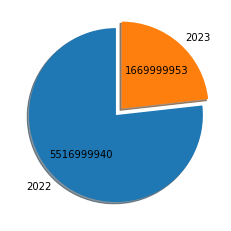

In [ ]:
label = list(most_money.Season)
values = list(most_money.Price)
explodes = [0, 0.1]
total = sum(values)
plt.pie(x=values, labels=label, startangle=90, explode=explodes, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True)
plt.show()

So From above analysis we can conclude that most money was spent in year 2022 as compared to 2023

In [ ]:
nationality = df['Nationality'].value_counts()
nationality =pd.DataFrame(nationality)
nationality.reset_index(inplace=True)
nationality['Players'] = nationality['index']
nationality.drop('index', axis=1, inplace=True)
nationality

,Nationality,Players
0,188,Indian
1,96,Overseas


In [ ]:
fig = exp.bar(nationality, x='Players', y='Nationality', title='Count of overseas and Indian players', width=400, height=400)
fig

So as we know that Ipl is hosted in india, it is but obvious that the count of indian players would be more. So we can conclude that in IPL indians player count is more than the overseas players

In [ ]:
top_10 = df[['Name','Price','Season']].sort_values("Price", axis = 0, ascending = False)[:10]
top_10.reset_index(inplace=True)
top_10.drop('index', axis=1, inplace=True)
top_10

,Name,Price,Season
0,Sam Curran,185000000,2023
1,Cameron Green,175000000,2023
2,Ben Stokes,162500000,2023
3,Nicholas Pooran,160000000,2023
4,Ishan Kishan,152500000,2022
5,Deepak Chahar,140000000,2022
6,Harry Brook,132500000,2023
7,Shreyas Iyer,122500000,2022
8,Liam Livingstone,115000000,2022
9,Wanindu Hasaranga,107500000,2022


In [ ]:
fig =exp.bar(top_10, x='Price', y='Name', color='Season', height=600)
fig.update_layout(title_text = "Top-10 Auction Buys")
fig.show()

So these are the top10 auction buys from both the years 2022 and 2023 with ***sam curran*** with the highest paid player regardless of the season

In [ ]:
money_spent_by_teams = df.groupby('Team')['Price'].sum().sort_values(ascending=False)
money_spent_by_teams = pd.DataFrame(money_spent_by_teams)
money_spent_by_teams.reset_index(inplace=True)
money_spent_by_teams

,Team,Price
0,Sunrisers Hyderabad,1036000000
1,Punjab Kings,885500000
2,Lucknow Super Giants,788000000
3,Rajasthan Royals,709000000
4,Mumbai Indians,684000000
5,Gujarat Titans,666500000
6,Chennai Super Kings,640000000
7,Royal Challengers Bangalore,624500000
8,Delhi Capitals,624000000
9,Kolkata Knight Riders,529500000


In [ ]:
fig =exp.bar(money_spent_by_teams, x='Price', y='Team', color='Price', height=600)
fig.update_layout(title_text = "Money spent by teams in crore")
fig.show()

So we can see that ***Sunrisers Hyderabad*** spent most money in IPL auction, which is nearly around ***1 Billion***

In [ ]:
max_paid = df.groupby('Type')[['Name', 'Price']].max()
max_paid.reset_index(inplace=True)
max_paid

,Type,Name,Price
0,All-Rounder,Yudhvir Charak,185000000
1,Batsman,Subhranshu Senapati,122500000
2,Batter,Will Jacks,132500000
3,Bowler,Yuzvendra Chahal,140000000
4,Wicket Keeper,Wriddhiman Saha,152500000
5,Wicket-Keeper,Vishnu Vinod,160000000


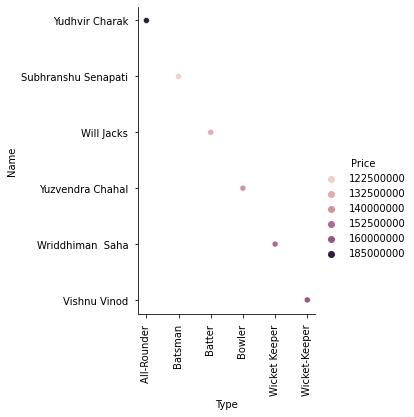

In [ ]:
sns.relplot(data=max_paid, x='Type', y='Name', hue='Price')
plt.xticks(rotation=90)
plt.show()

***Yudhvir Charak*** is the highest paid all-rounder, ***Subhranshu Senapati*** is highest paid batsman, ***Will Jacks*** is highest paid Batsman, ***Yuzvendra Cahal*** is the highest paid Bowler and ***Wriddhiman Saha and Vishnu Vinod*** are the highets paid Wicket-keepers

In [ ]:
df.tail()

,Season,Name,Nationality,Type,Team,Price
279,2022,Fazalhaq Farooqi,Overseas,Bowler,Sunrisers Hyderabad,5000000
280,2022,Sean Abbott,Overseas,Bowler,Sunrisers Hyderabad,24000000
281,2022,R Samarth,Indian,Batsman,Sunrisers Hyderabad,2000000
282,2022,Shashank Singh,Indian,All-Rounder,Sunrisers Hyderabad,2000000
283,2022,Saurabh Dubey,Indian,Bowler,Sunrisers Hyderabad,2000000
